In [1]:
%matplotlib inline
import numpy as np
import scipy.constants as const 
phi_gold =const.golden_ratio
import matplotlib.pyplot as plt
import matplotlib

In [2]:
font = {'size'   : 18, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
# matplotlib.mathtext.rcParams['legend.fontsize']='medium'

## Input parameters (TODO)

In [3]:
cmb_temperature = 2.7255
hubble_const = 0.67810
o_b = 0.02238280
o_cdm = 0.1201075

## Evolutions of energy densities 

### Getting energy density manually

\begin{equation}
    \rho_i = \Omega_{i,0}H_0^2a^{-3(1+w_i)}
\end{equation}

### Using CLASS

In [4]:
from classy import Class
cosmo = Class()
cosmo.set({
            'T_cmb': cmb_temperature,
            'h': hubble_const,
            'omega_b': o_b,
            'omega_cdm': o_cdm,
            'background_verbose': 1
           }
          )
cosmo.compute()

Running CLASS version v3.2.1
Computing background
 -> age = 13.770598 Gyr
 -> conformal age = 14151.897989 Mpc
 -> N_eff = 3.044 (summed over all species that are non-relativistic at early times) 
 -> radiation/matter equality at z = 3405.751108
    corresponding to conformal time = 112.722902 Mpc


In [59]:
const.G/1e9/(const.c/1000)**2*1000

7.4261602691186655e-28

In [5]:
c_in_kmps = const.c/1000 # speed of light in km/s
H0_1_over_Mpc = cosmo.Hubble(0) # call Hubble constant (in unit of Mpc^{-1}) at redshift 0 
# -----------------------------------------------
# Note: To recover the Hubble constant in km/s/Mpc,
# multiplying H_1_over_Mpc with the speed of light (km/s)
H0 = H0_1_over_Mpc*c_in_kmps 

# -----------------------------------------------
c_over_H = c_in_kmps/H0_1_over_Mpc # c/H0 in REAL Mpc

#------------------------------------------------
# get list of background quanties
bg = cosmo.get_background()

#------------------------------------------------
# get list of each background quantity
z = bg['z']
z_eq = cosmo.z_eq()
a_eq = 1./(z_eq+1.)
a = 1./(z+1.)
rho_m = bg['(.)rho_b'] + bg['(.)rho_cdm']   # energy density of matter
rho_r = bg['(.)rho_g'] + bg['(.)rho_ur']    # energy density of radiation
rho_crit = bg['(.)rho_crit']

#------------------------------------------------
d_L = bg['lum. dist.']       # Luminosity distance
d_A = bg['ang.diam.dist.']   # Angular diameter distance
d_com = bg['comov. dist.']   # Comoving distance

# cosmo.struct_cleanup()

In [6]:
Mpc_over_m = 1.e6*const.parsec # 1 Mpc to m
Mpc_over_km = 1.e3*const.parsec # 1 Mpc to km

In [94]:
H0**2*1000**2/(const.G*Mpc_over_m**2) # critical density in SI kg/m^3

7.235702039500658e-26

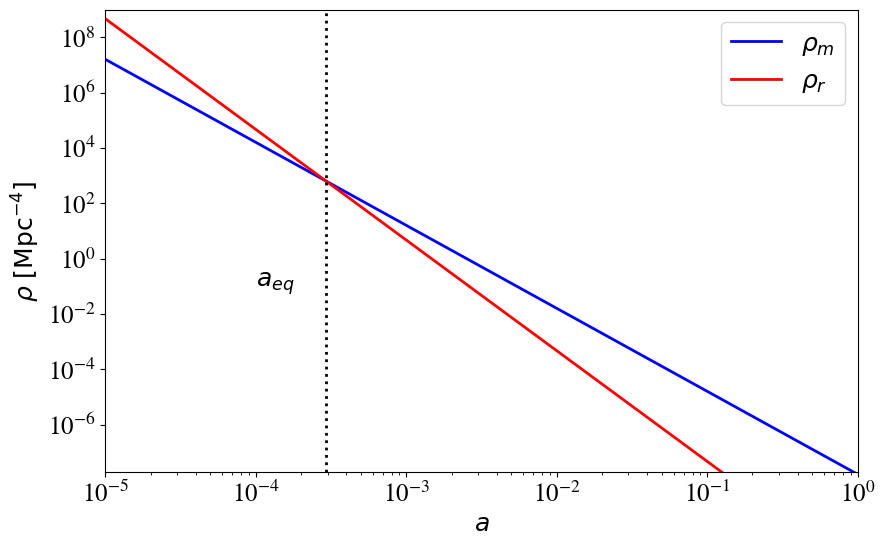

In [7]:
# Plot evolution of matter and radiation
fig1, ax1 = plt.subplots(figsize=(6*phi_gold, 6))
ax1.loglog(a,rho_m,label=r'$\rho_m$', lw=2,color='b')
ax1.loglog(a,rho_r,label=r'$\rho_r$',lw=2,color='r')
plt.axvline(x = a_eq, color='k', ls = ':', lw=2)
plt.xlim(1.e-5,1)
plt.ylim(2.e-8,1.e9)
plt.text(1.e-4,0.1,r'$a_{eq}$')
plt.xlabel('$a$')
plt.ylabel(r'$\rho\,\,[\mathrm{Mpc}^{-4}]$')
plt.legend()
plt.show()
# plt.savefig('mat_rad_evolution.pdf')

### Evolutions of (nomalised) Density parameters (TODO)

## Cosmological distances (TODO)

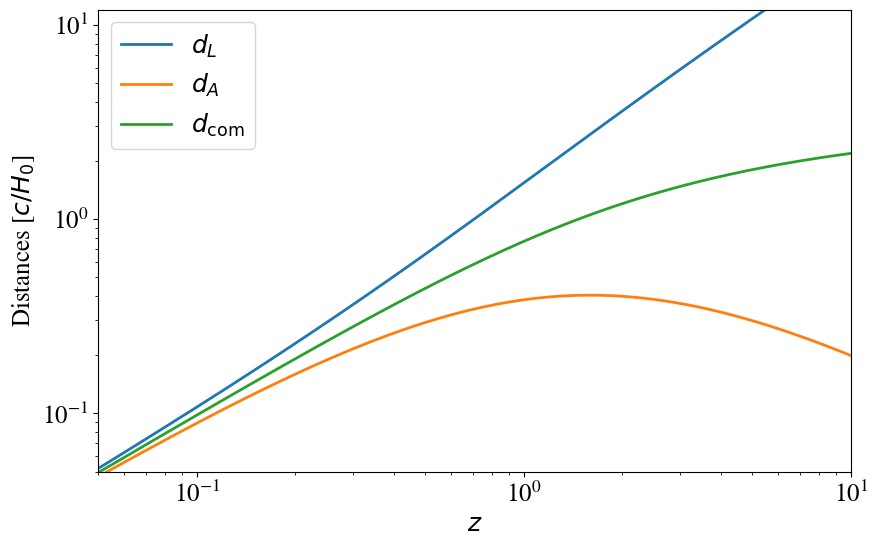

In [10]:
# Luminosity distance, comoving distance, angular diameter distance 
fig2, ax2 = plt.subplots(figsize=(6*phi_gold, 6))
ax2.loglog(z,d_L*hubble_const*100/c_in_kmps, label=r'$d_L$',lw=2)
ax2.loglog(z,d_A*hubble_const*100/c_in_kmps,label=r'$d_A$',lw=2)
ax2.loglog(z,d_com*hubble_const*100/c_in_kmps,label=r'$d_\text{com}$',lw=2)
plt.xlim(0.05,10)
plt.ylim(0.05,12)
plt.legend()
plt.ylabel(r'Distances [$c/H_0$]')
plt.xlabel('$z$')
plt.savefig('distances.pdf')